In [1]:
import zipfile
with zipfile.ZipFile("../data/iChallene-AMD-Training400.zip", 'r') as zip_ref:
    zip_ref.extract('Training400/AMD/A0001.jpg', 'temp')

In [2]:
import cv2
import numpy as np

img = cv2.imread('./temp/Training400/AMD/A0001.jpg')

In [3]:
def showImage(img):
    cv2.namedWindow('image', cv2.WINDOW_NORMAL)
    cv2.resizeWindow('image', 600,600)
    cv2.imshow('image',img)
    cv2.waitKey(0)
    cv2.destroyAllWindows()
showImage(img)

In [4]:
# grayscale
cimg = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)

cimg = cv2.medianBlur(cimg,5)

showImage(cimg)


In [7]:
import matplotlib.pyplot as plt
# fourier transform using opencv
dft = cv2.dft(np.float32(cimg),flags = cv2.DFT_COMPLEX_OUTPUT)
dft_shift = np.fft.fftshift(dft)
magnitude_spectrum = 20*np.log(cv2.magnitude(dft_shift[:,:,0],dft_shift[:,:,1]))
plt.subplot(121),plt.imshow(img, cmap = 'gray')
plt.title('Input Image'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(magnitude_spectrum, cmap = 'gray')
plt.title('Magnitude Spectrum'), plt.xticks([]), plt.yticks([])
plt.show()

<Figure size 640x480 with 2 Axes>

1028 1062


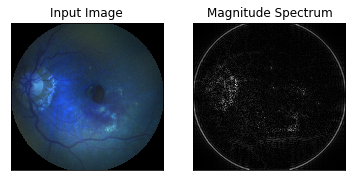

In [8]:
# inverse DFT to bring the image back after high pass filtering (edge detection)
rows, cols = cimg.shape
crow,ccol = rows//2 , cols//2
# create a mask first, center square is 0, remaining all ones
mask = np.ones((rows,cols,2),np.uint8)
print(crow, ccol)
mask[(crow-30):(crow+30), (ccol-30):(ccol+30)] = 0
# apply mask and inverse DFT
fshift = dft_shift*mask
f_ishift = np.fft.ifftshift(fshift)
img_back = cv2.idft(f_ishift)
img_back = cv2.magnitude(img_back[:,:,0],img_back[:,:,1])

In [9]:
plt.subplot(121),plt.imshow(img, cmap = 'gray')
plt.title('Input Image'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(img_back, cmap = 'gray')
plt.title('Magnitude Spectrum'), plt.xticks([]), plt.yticks([])
plt.show()

AttributeError: module 'matplotlib.pyplot' has no attribute 'size'